In [ ]:
import warnings
warnings.filterwarnings("ignore")

###### IMPORTING REQUIRED LIBRARIES

In [ ]:
# Importing Libraries
import pandas as pd #For Data Manipulation

import matplotlib.pyplot as plt #For Data Visualisation
%matplotlib inline

import seaborn as sns

###### IMPORTING THE DATASET

In [ ]:
#Importing Data set
df = pd.read_excel('superstore_sales.xlsx')

##### DATA AUDIT

In [ ]:
df.head()

In [243]:
#Shape of the dataset
df.shape

(51290, 25)

In [ ]:
#Checking for Null values
df.isnull().sum()

In [ ]:
# A concise summary of the dataset
df.info()

In [ ]:
#Descriptive Statistics summary
df.describe()

### DATA MANIPULATION AND ANALYSIS

In [244]:
#Extracting Month number from ordered date
import datetime as dt
df['month_number'] = df['order_date'].dt.month
df['Year'] = df['order_date'].dt.year

In [ ]:
#Converting Month number to Month Name
import calendar
df['Month'] = df['month_number'].apply(lambda x: calendar.month_abbr[x])

#### 1. WHAT IS THE OVERALL SALES TREND?

In [ ]:
#Grouping Total Sales by Month
df_Sales = pd.DataFrame(df.groupby('Month').sum()['sales'].reset_index())

# Sorting the dataframe in descending order
df_Sales.sort_values(by=['sales'], inplace=True, ascending=False)

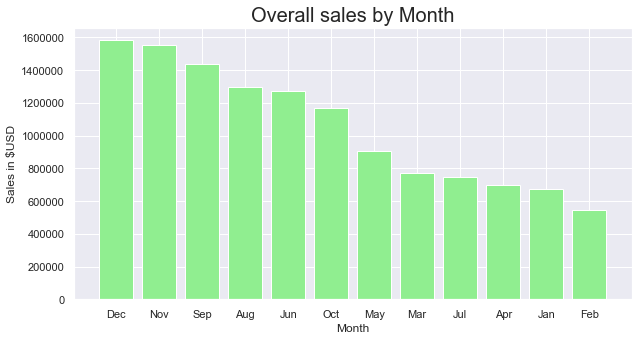

In [240]:
# Plotting Sales by Month Graph
plt.figure(figsize=(10, 5))

plt.bar(df_Sales['Month'],df_Sales['sales'] , color = 'lightgreen')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title("Overall sales by Month" , size = 20)
plt.xlabel('Month')
plt.ylabel('Sales in $USD')

plt.show()

In [251]:
#Grouping Total Sales by Month
df_Sales_year = pd.DataFrame(df.groupby('Year').sum()['sales'].reset_index())


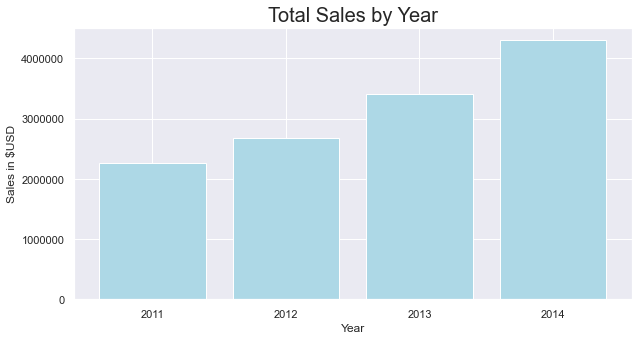

In [255]:
# Plotting Sales by Month Graph
plt.figure(figsize=(10, 5))

plt.bar(df_Sales_year['Year'],df_Sales_year['sales'] , color = 'lightblue')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title("Total Sales by Year" , size = 20)
plt.xlabel('Year')
plt.ylabel('Sales in $USD')
plt.xticks(df_Sales_year['Year'])

plt.show()

#### 2. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [ ]:
# Grouping products by sales
Product_Sales = pd.DataFrame(df.groupby('product_name').sum()['sales'].reset_index())

# Sorting the dataframe in descending order
Product_Sales.sort_values(by=['sales'], inplace=True, ascending=False)

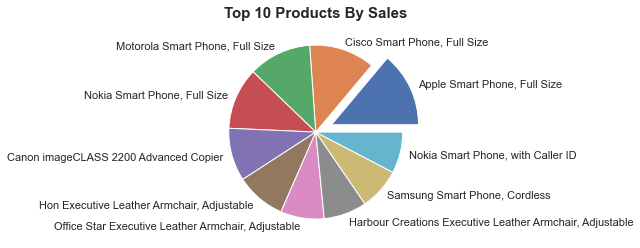

In [242]:
#Visualising top 10 products by sale
myexplode = [0.2, 0, 0, 0 , 0 , 0, 0 , 0 ,0 , 0]

plt.pie(Product_Sales['sales'][:10], labels = Product_Sales['product_name'][:10] , explode = myexplode)

plt.title('Top 10 Products By Sales' , weight = 'bold' , size = 15)

# show plot
plt.show()

#### 3. WHICH ARE THE BEST/MOST SELLING PRODUCTS?

In [ ]:
# Grouping products by Quantity
Best_Selling_Products = pd.DataFrame(df.groupby('product_name').sum()['quantity'].reset_index())

# Sorting the dataframe in descending order
Best_Selling_Products.sort_values(by=['quantity'], inplace=True, ascending=False)


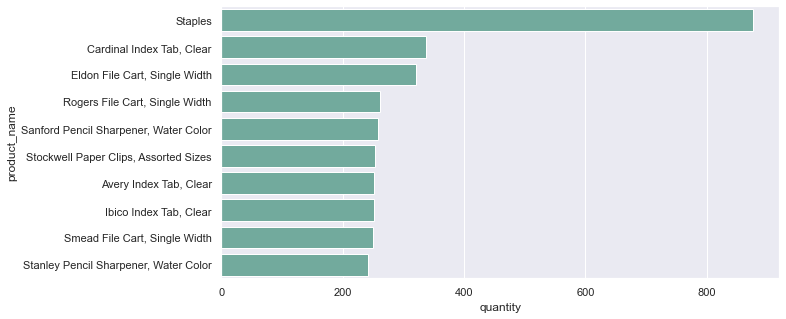

In [241]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Make a barplot
sns.barplot(
    x="quantity", 
    y="product_name", 
    data=Best_Selling_Products[:10], 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
);

#### 4. WHAT IS THE MOST PREFERRED SHIP MODE?

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 5))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data = df)

# Display the figure
plt.show()

#### 5. WHICH CATEGORY AND SUB-CATEGORY ARE THE MOST PROFITABLE?

In [213]:
# Grouping products by Category and Sub-Category
Sales_Category = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'].reset_index())

# Sorting the values
Sales_Category.sort_values(['category','profit'], ascending=False)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


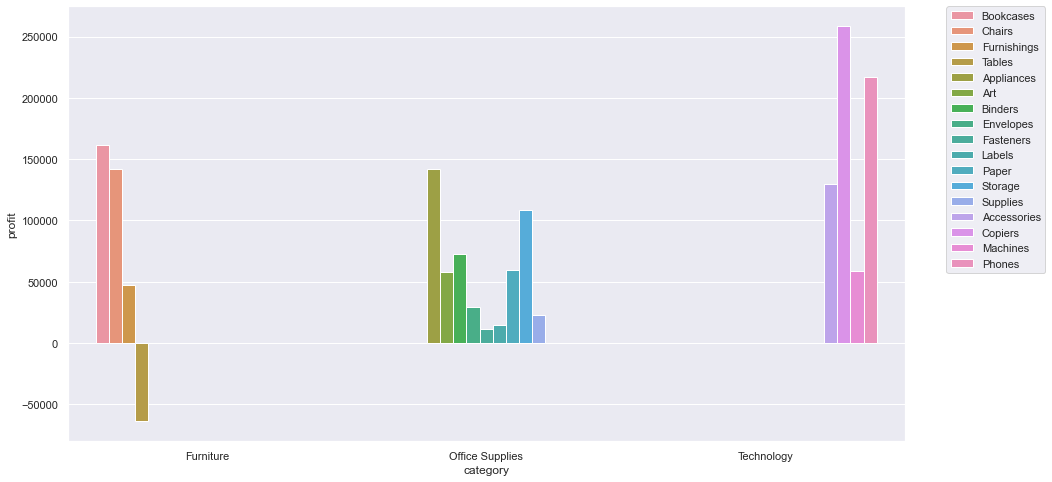

In [237]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 8))


# grouped barplot
sns.barplot(x="category", y="profit", hue="sub_category", data= Sales_Category, ci=None);

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)